# Lab Segmentation 2

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

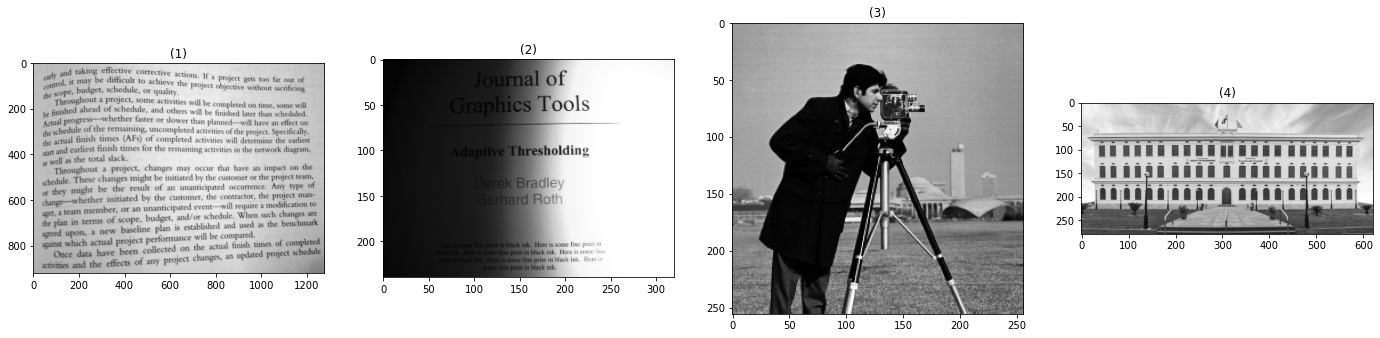

0.0 64.0 68.5 0.0


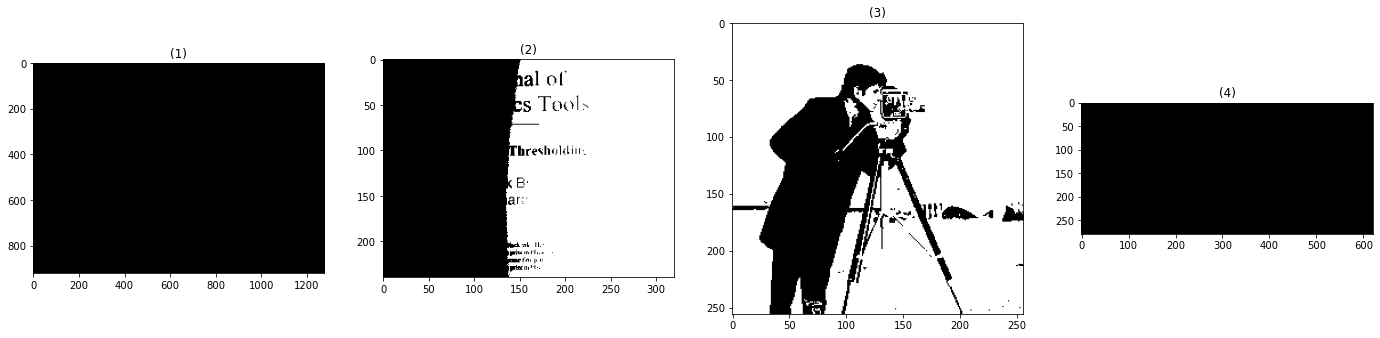

In [22]:
def get_hist(img):
    N, M = img.shape
    hist = np.zeros(256)
    for i in range(N):
        for j in range(M):
            hist[img[i][j]] += 1
    return hist
def global_thresh(img):
    # Convert the image to Unit8
    img = img.astype('uint8')*255
    # Get counts array that contains the number of pixels in each grey-level.
    hist = get_hist(img)
    # Get initial threshold by getting the average mean of the pixels’ grey-level
    total = np.cumsum(hist)[255]
    prev_thresh = 0
    for i in range(256):
        prev_thresh += (i*hist[i])
    prev_thresh = round(prev_thresh/total)

    while True:
        thresh1 = 0
        thresh2 = 0
        tot1 = 0
        tot2 = 0
        # for i in range(img.shape[0]):
        #     for j in range(img.shape[1]):
        #         if img[i][j] >= prev_thresh:

        for i in range(int(prev_thresh)):
            thresh1 += (i*hist[i])
            tot1 += hist[i]
        for i in range(int(prev_thresh), 256):
            thresh2 += (i*hist[i])
            tot2 += hist[i]
        # for i in range(256):
        #     if hist[i] > prev_thresh:
        #     else:
        #         thresh2 += (i*hist[i])
        #         tot2 += hist[i]
        
        if tot1 == 0:
            thresh1 = 0
        else:
            thresh1 = round(thresh1/tot1)
        
        if tot2 == 0:
            thresh2 = 0
        else:
            thresh2 = round(thresh2/tot2)

        cur_thresh = (thresh1+thresh2)/2
        if cur_thresh == prev_thresh:
            break
        else:
            prev_thresh = cur_thresh
    return prev_thresh


book1 = rgb2gray(io.imread('book1.png'))
book = rgb2gray(io.imread('book.png'))
cameraman = rgb2gray(io.imread('cameraman.png'))
cufe = rgb2gray(io.imread('cufe.png'))
show_images([book1, book, cameraman, cufe])

book1_thresh = global_thresh(book1)
book_thresh = global_thresh(book)
cameraman_thresh = global_thresh(cameraman)
cufe_thresh = global_thresh(cufe)
print(book1_thresh, book_thresh, cameraman_thresh, cufe_thresh)

bin_book1 = 1.0*(book1 > book1_thresh)
bin_book = 1.0*(book > book_thresh)
bin_cameraman = 1.0*(cameraman > cameraman_thresh)
bin_cufe = 1.0*(cufe > cufe_thresh)
show_images([bin_book1, bin_book, bin_cameraman, bin_cufe])

